In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy

In [13]:
!pip install geopandas

  Using cached geopandas-0.14.2-py3-none-any.whl.metadata (1.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached geopandas-0.14.2-py3-none-any.whl (1.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 4.4 MB/s eta 0:00:0000:0100:01m


In [6]:
import pandas as pd
file_path = '/Users/yuvvvvv/Downloads/catA_train.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361,Employment Agencies,73610000,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0,0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449,"Water Transportation of Freight, Not Elsewhere...",44490000,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0,0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1,0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0,0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719,"Offices of Holding Companies, Not Elsewhere Cl...",67190000,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1,1


In [7]:
print(dataset.shape)

(29182, 28)


In [8]:
dataset = dataset.dropna(subset=['LATITUDE', 'LONGITUDE'])

/var/folders/k4/5t9w_3t17bx_h1kzys3r8tvh0000gn/T/ipykernel_12726/3107871215.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


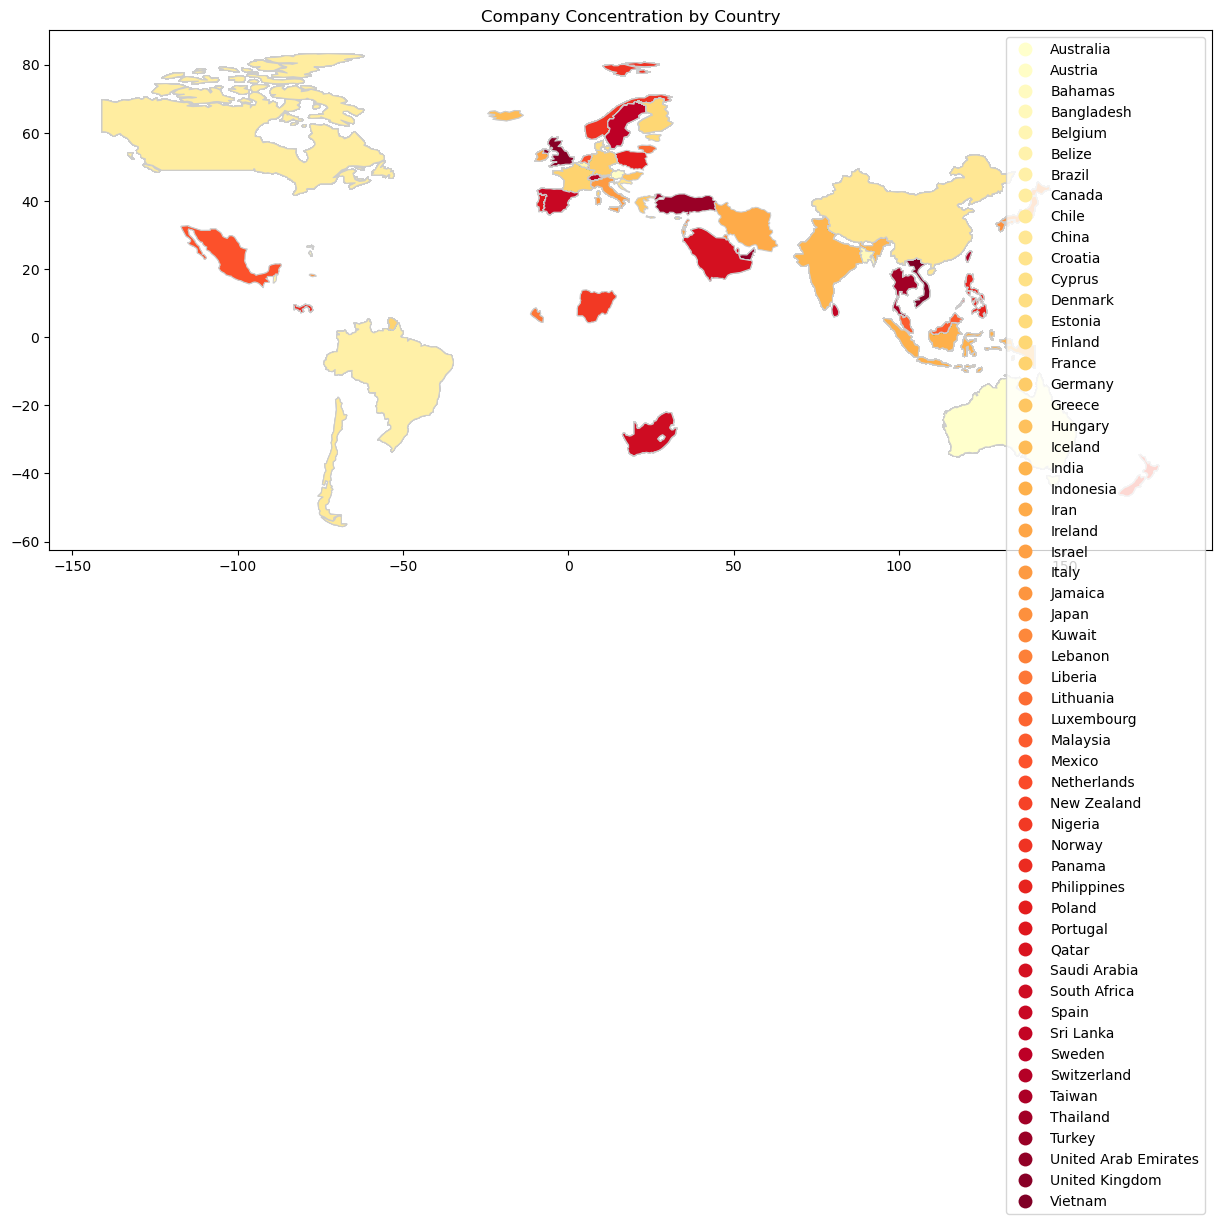

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame with the 'country' column
# and 'world' is the GeoDataFrame with world geometries (you can download it from GeoPandas)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name_upper'] = world['name'].str.upper()
dataset['Global Ultimate Country_upper'] = dataset['Global Ultimate Country'].str.upper()


# Merge 'world' with your 'dataset' on the 'country' column
merged = world.merge(dataset, left_on='name_upper', right_on='Global Ultimate Country_upper')

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Global Ultimate Country', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and show the plot
plt.title('Company Concentration by Country')
plt.show()


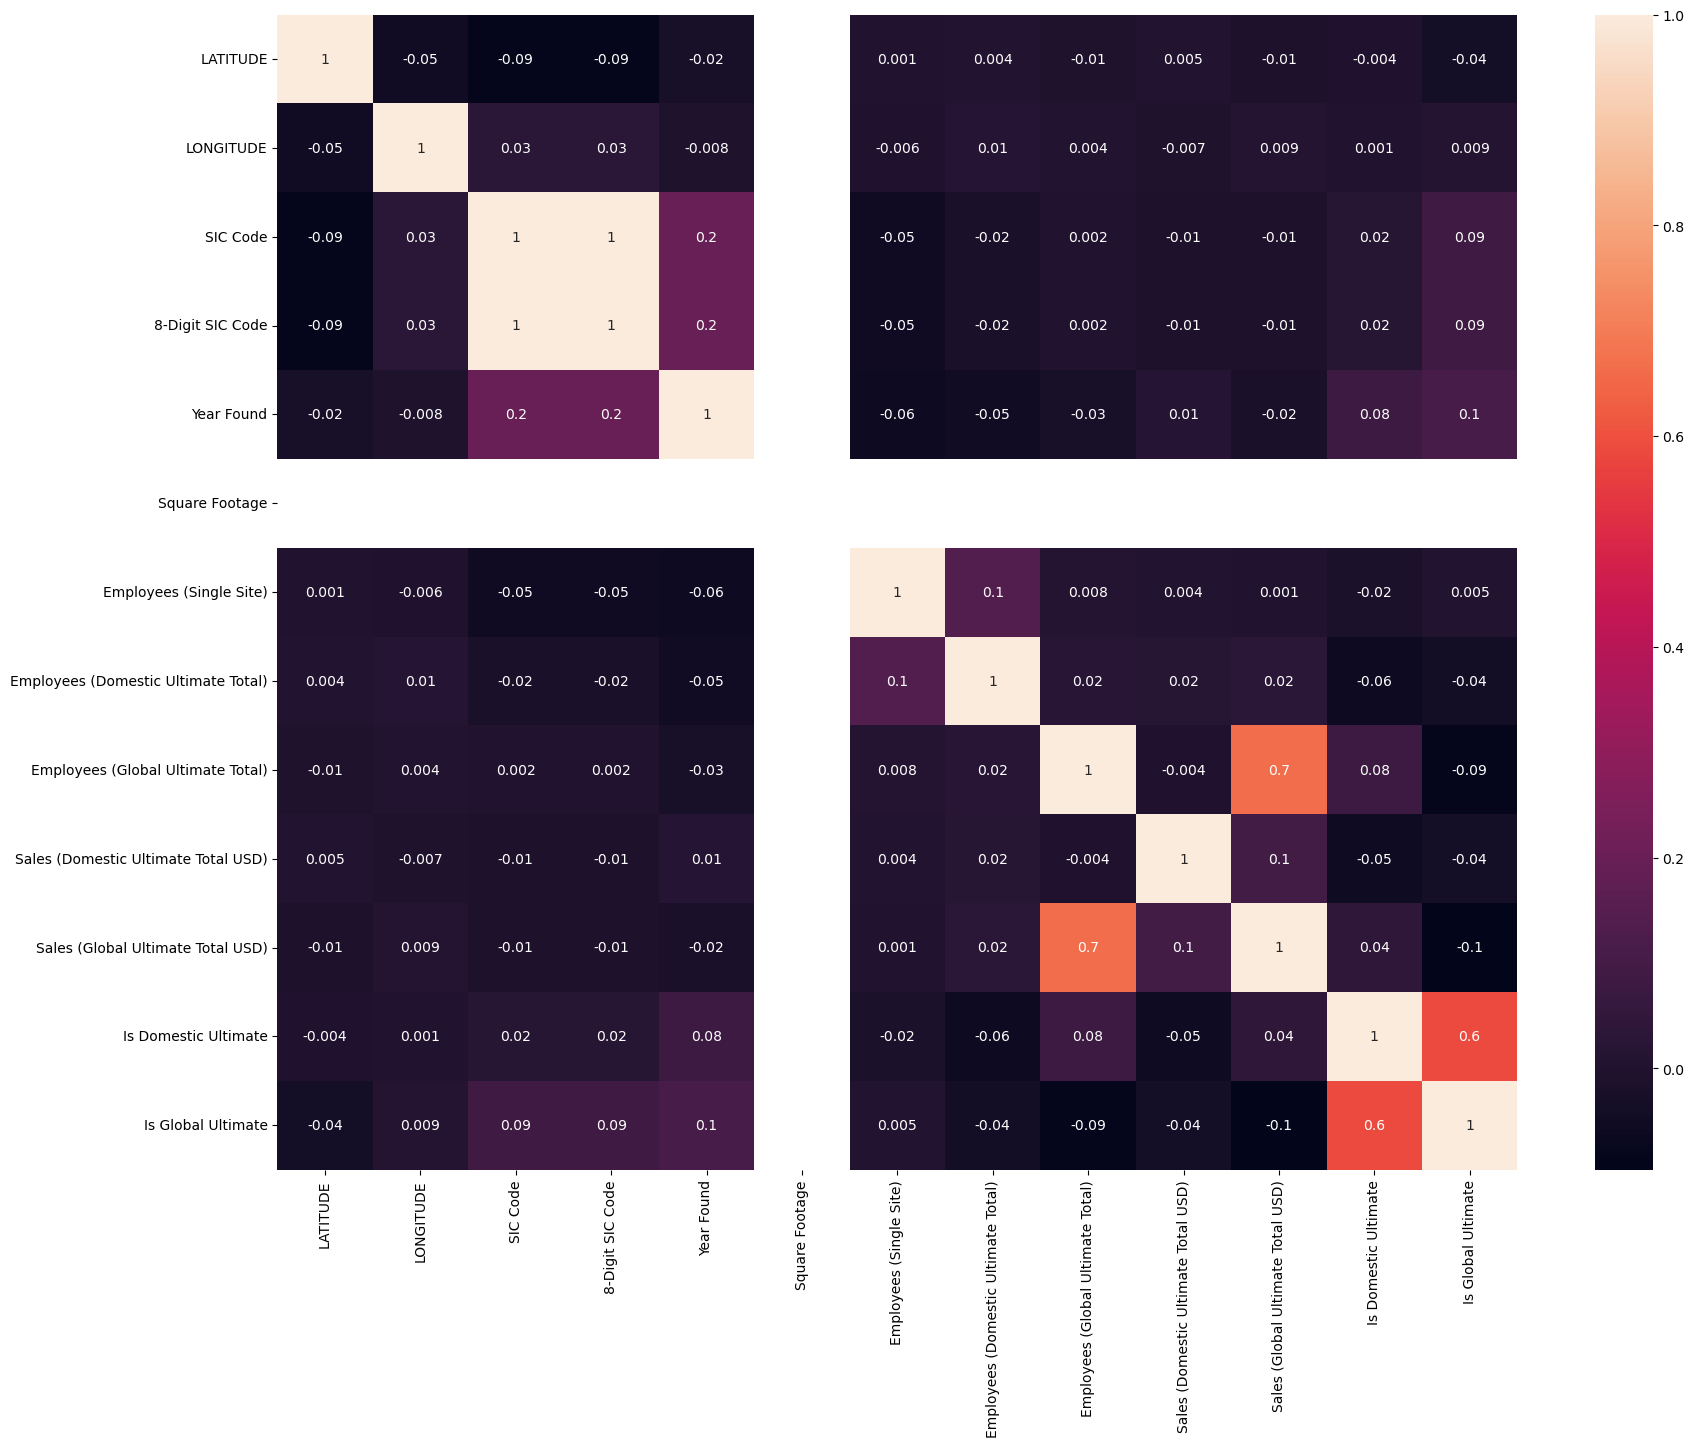

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = dataset.corr()
figure=plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True,fmt=".1g")
plt.show()

In [56]:
sic_counts = dataset['SIC Code'].value_counts()
sic_counts_df = sic_counts.reset_index()
sic_counts_df.columns = ['SIC Code', 'Count']
threshold = 10
filtered_sic_counts_df = sic_counts_df[sic_counts_df['Count'] >= threshold]

industry_names = []

#search the dataset for industry name
for code in list(filtered_sic_counts_df["SIC Code"]):
    matching_row = dataset.loc[dataset['SIC Code'] == code].iloc[0]
    industry_name = matching_row['Industry']
    industry_names.append(industry_name)
    
filtered_sic_counts_df['Company Name'] = industry_names
print(filtered_sic_counts_df)


     SIC Code  Count                                       Company Name
0        6719   7743  Offices of Holding Companies, Not Elsewhere Cl...
1        8742   1387                     Management Consulting Services
2        7371    774                      Computer Programming Services
3        4731    734  Arrangement of Transportation of Freight and C...
4        7389    692        Business Services, Not Elsewhere Classified
..        ...    ...                                                ...
273      8021     10                    Offices and Clinics of Dentists
274      7381     10         Detective, Guard, and Armored Car Services
275      7549     10   Automotive Services, Except Repair and Carwashes
276      8322     10              Individual and Family Social Services
277      3663     10  Radio and Television Broadcasting and Communic...

[278 rows x 3 columns]


/var/folders/k4/5t9w_3t17bx_h1kzys3r8tvh0000gn/T/ipykernel_12726/1436926993.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sic_counts_df['Company Name'] = industry_names


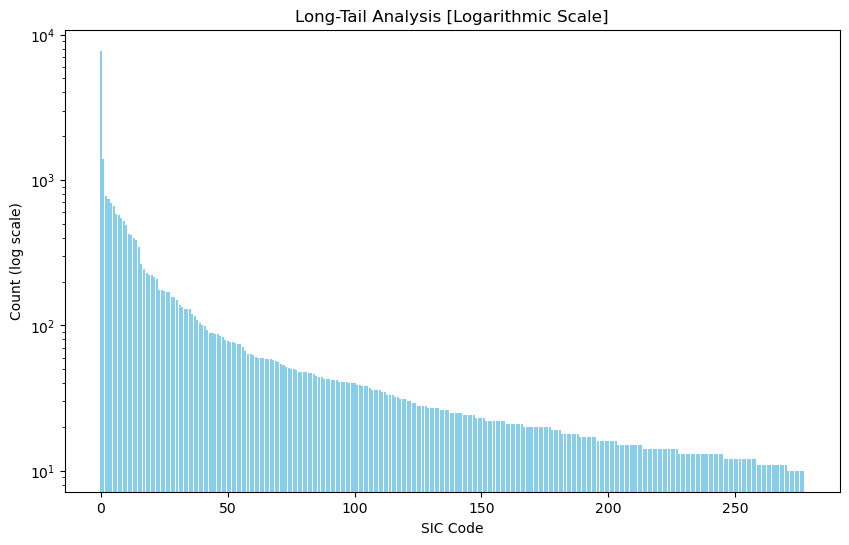

Top Entries in the Long Tail:
   SIC Code  Count                                       Company Name
0      6719   7743  Offices of Holding Companies, Not Elsewhere Cl...
1      8742   1387                     Management Consulting Services
2      7371    774                      Computer Programming Services
3      4731    734  Arrangement of Transportation of Freight and C...
4      7389    692        Business Services, Not Elsewhere Classified
5      5099    664            Durable Goods, Not Elsewhere Classified
6      8711    579                               Engineering Services
7      6552    577  Land Subdividers and Developers, Except Cemete...
8      4499    550  Water Transportation Services, Not Elsewhere C...
9      5812    518                                      Eating Places

Bottom Entries in the Long Tail:
     SIC Code  Count                                       Company Name
261      5092     11                  Toys and Hobby Goods and Supplies
260      2844     11  

In [61]:
# Sort the dataset based on the 'Count' column in descending order
sorted_dataset = filtered_sic_counts_df.sort_values(by='Count', ascending=False)

# Plot the long-tail distribution
plt.figure(figsize=(10, 6))
plt.bar(sorted_dataset.index, sorted_dataset['Count'], color='skyblue')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('SIC Code')
plt.ylabel('Count (log scale)')
plt.title('Long-Tail Analysis [Logarithmic Scale]')
plt.show()

# Display the top and bottom entries in the long tail
top_entries = sorted_dataset.head(10)
bottom_entries = sorted_dataset.tail(10)

print("Top Entries in the Long Tail:")
print(top_entries[['SIC Code', 'Count', 'Company Name']])

print("\nBottom Entries in the Long Tail:")
print(bottom_entries[['SIC Code', 'Count', 'Company Name']])


In [62]:
import pandas as pd

# Assuming 'dataset' is your DataFrame with the 'SIC Code' column
sic_counts = dataset['SIC Code'].value_counts()
threshold = 10 

# Filter SIC codes based on the threshold
filtered_sic_codes = sic_counts[sic_counts < threshold].index

# Create a new DataFrame with rows containing only SIC codes below the threshold
filtered_dataset = dataset[dataset['SIC Code'].isin(filtered_sic_codes)]

# Sort the filtered SIC codes based on the number of occurrences
sorted_sic_codes = sorted(filtered_sic_codes, key=lambda x: sic_counts[x], reverse=True)

# Display the sorted list of SIC codes
print(sorted_sic_codes)



[5078, 3714, 2095, 3411, 3499, 7363, 1499, 4725, 3273, 2599, 3496, 2911, 3429, 8399, 4841, 2732, 4729, 3585, 8243, 8059, 5083, 3711, 3571, 7377, 1381, 3069, 2086, 2253, 1721, 5147, 3315, 2035, 6331, 3911, 3061, 7513, 3625, 3442, 2087, 3494, 781, 7521, 6512, 3829, 3643, 5942, 7538, 7261, 5441, 7375, 7313, 7996, 2673, 2048, 5144, 4141, 5399, 2013, 3086, 2011, 4215, 1771, 3548, 2992, 2299, 7323, 2711, 2066, 3632, 5551, 2519, 5211, 5661, 742, 3452, 6351, 3511, 3721, 3641, 4959, 3695, 3443, 5421, 8621, 9711, 8412, 7322, 4111, 3532, 5048, 5181, 3534, 2521, 4482, 5139, 3053, 2841, 3449, 7819, 2298, 7383, 5541, 3339, 2076, 4513, 2329, 7331, 2259, 5714, 3651, 7338, 2879, 8422, 4412, 3629, 6231, 1521, 2038, 5641, 7829, 5193, 2893, 4941, 2514, 1795, 1531, 851, 4011, 9311, 273, 4619, 2676, 6162, 4121, 3556, 3431, 4961, 7941, 3562, 5948, 4222, 5731, 7623, 3812, 3542, 3873, 3648, 3694, 2024, 3399, 1742, 3536, 3084, 3356, 2652, 3317, 3491, 3993, 5946, 3944, 2091, 3822, 3678, 7993, 2082, 2752, 8699, 2

In [63]:
#Mapping of parent to child companies

In [ ]:
import csv
from pprint import pprint

def read_csv(csvfilename):
    """
    Reads a csv file and returns a list of lists
    containing rows in the csv file and its entries.
    """
    with open(csvfilename, encoding='utf-8') as csvfile:
        return list(csv.reader(csvfile))

data = read_csv("global_domestic.csv")[1:]

global_ultimate_list = list(map(lambda x: x[2], data))
domestic_ultimate_list = list(map(lambda x: x[3], data))

global_dict = {}
for company in global_ultimate_list:
    global_dict[company] = {}

for company, parent, g_ultimate, d_ultimate, is_d, is_g in data:
    is_g, is_d = bool(int(is_g)), bool(int(is_d))
    if is_d:
        if company not in global_dict[g_ultimate]:
            global_dict[g_ultimate][company] = []
    else:
        if d_ultimate not in global_dict[g_ultimate]:
            global_dict[g_ultimate][d_ultimate] = []
            global_dict[g_ultimate][d_ultimate].append(company)
        elif d_ultimate in global_dict[g_ultimate]:
            global_dict[g_ultimate][d_ultimate].append(company)

print(global_dict)